In [3]:
import os as os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [10]:
import os
import pandas as pd

def combine_csvs(input_dir, output_file):
    all_dataframes = []

    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(file_path, header=None, skiprows=2)
                    all_dataframes.append(df)
                except Exception as e:
                    print(f"Failed to read {file_path}: {e}")
    
    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)

        with open(output_file, 'w', newline='') as f:
            f.write("Care,Fairness,Loyalty,Authority,Sanctity\n")
            f.write("Harm,Cheating,Betrayal,Subversion,Degradation\n")
            combined_df.to_csv(f, header=False, index=False)
    else:
        print("No CSV files found.")

combine_csvs("new_cluster/original_dimensions/by_org", "new_cluster/custom_files/dimensions/combined_dimensions.csv")

In [ ]:
"""combine the files from the lowest directory into one file"""

"""depth = 1 means it combines all files from the second to last directory"""
"""depth = 0 means it combines all files from the last directory"""
"""label = False means 1 line header"""


def combine_files_by_organisation(output_dir, root_path, depth=1, label=False):
    os.makedirs(output_dir, exist_ok=True)
    header_option = 0 if label else [0, 1]

    if depth == 1:
        for folder_org in sorted(os.listdir(root_path)):
            org_path = os.path.join(root_path, folder_org)
            combined_df = []
            output_file = os.path.join(output_dir, f"{folder_org}.csv")
            # Combine files from each subdirectory
            for sub_dir in sorted(os.listdir(org_path)):
                sub_path = os.path.join(org_path, sub_dir)
                if os.path.isdir(sub_path):
                    for filename in sorted(os.listdir(sub_path)):
                        file_path = os.path.join(sub_path, filename)
                        if os.path.isfile(file_path) and file_path.endswith(".csv"):
                            df = pd.read_csv(file_path, header=header_option)
                            combined_df.append(df)
            if combined_df:
                final_df = pd.concat(combined_df, ignore_index=True)
                final_df.to_csv(output_file, index=False)
                print(f"CSV saved to: {output_file}")
            else:
                print(f"No CSV files found.")

    if depth == 0:
        for folder_org in sorted(os.listdir(root_path)):
            org_path = os.path.join(root_path, folder_org)
            for root, dirs, files in os.walk(org_path):
                if not dirs:  # If there are no subdirectories, this is a last-level directory
                    combined_df = []
                    last_level_name = os.path.basename(root)
                    output_file = os.path.join(output_dir, f"{last_level_name}.csv")

                    for filename in sorted(files):
                        file_path = os.path.join(root, filename)
                        if file_path.endswith(".csv"):
                            df = pd.read_csv(file_path, header=header_option)
                            combined_df.append(df)

                    if combined_df:
                        final_df = pd.concat(combined_df, ignore_index=True)
                        final_df.to_csv(output_file, index=False)
                        print(f"CSV saved to: {output_file}")
                    else:
                        print(f"No CSV files found in {root}.")

In [ ]:
input_path = "new_cluster/original_labels/by_org"
output_path = "new_cluster/custom_files/labels"

combine_files_by_organisation(output_path, input_path)

input_path = "new_cluster/original_dimensions/by_org"
output_path = "new_cluster/custom_files/dimensions"

combine_files_by_organisation(output_path, input_path)

CSV saved to: new_cluster/custom/labels\IGO.csv
CSV saved to: new_cluster/custom/labels\NGO.csv
CSV saved to: new_cluster/custom/labels\Presse.csv


In [ ]:
input_path = "new_cluster/original_labels/by_year/Presse"
output_path = "new_cluster/custom_files/labels"

combine_files_by_organisation(output_path, input_path, depth=0, label=True)

CSV saved to: new_cluster/custom_files/labels\2008.csv
CSV saved to: new_cluster/custom_files/labels\2009.csv
CSV saved to: new_cluster/custom_files/labels\2010.csv
CSV saved to: new_cluster/custom_files/labels\2014.csv
CSV saved to: new_cluster/custom_files/labels\2015.csv
CSV saved to: new_cluster/custom_files/labels\2016.csv
CSV saved to: new_cluster/custom_files/labels\2017.csv
CSV saved to: new_cluster/custom_files/labels\2020.csv
CSV saved to: new_cluster/custom_files/labels\2021.csv


In [ ]:
input_path = "new_cluster/original_dimensions/by_year/Presse"
output_path = "new_cluster/custom_files/dimensions"

combine_files_by_organisation(output_path, input_path, depth=0, label=False)

CSV saved to: new_cluster/custom_files/dimensions\2008.csv
CSV saved to: new_cluster/custom_files/dimensions\2009.csv
CSV saved to: new_cluster/custom_files/dimensions\2010.csv
CSV saved to: new_cluster/custom_files/dimensions\2014.csv
CSV saved to: new_cluster/custom_files/dimensions\2015.csv
CSV saved to: new_cluster/custom_files/dimensions\2016.csv
CSV saved to: new_cluster/custom_files/dimensions\2017.csv
CSV saved to: new_cluster/custom_files/dimensions\2020.csv
CSV saved to: new_cluster/custom_files/dimensions\2021.csv


In [ ]:
input_path = "new_cluster/original_labels/by_year/Presse"
output_path = "new_cluster/custom_files/labels"

combine_files_by_organisation(output_path, input_path, depth=1)

CSV saved to: new_cluster/custom_files/labels\Presse_COP15.csv
CSV saved to: new_cluster/custom_files/labels\Presse_COP21.csv
CSV saved to: new_cluster/custom_files/labels\Presse_COP25_26.csv


In [11]:
import pandas as pd
import numpy as np

def load_clean_csv(path):
    return pd.read_csv(path, skiprows=2)

def compute_baseline(center_df, left_df, right_df):
    return (center_df.mean() + left_df.mean() + right_df.mean()) / 3

def compute_intensity_shift(df, baseline):
    # Squared difference between each value and the baseline
    squared_diff = (df - baseline) ** 2

    # Assuming equal n_w for now: weight = 1 for all words
    total_nw = len(df)  # or df.sum(axis=1) if you have actual n_w

    # Multiply each squared difference by n_w (=1)
    weighted_diff = squared_diff

    # Sum over all words per frame (column-wise), then normalize
    intensity_shift = weighted_diff.sum(axis=0) / total_nw

    return intensity_shift

def compute_all_shifts(center_path, left_path, right_path):
    columns = ["Care", "Fairness", "Loyalty", "Authority", "Sanctity"]
    center_df =  pd.read_csv(center_path, skiprows=2, header=None, names=columns)
    left_df = pd.read_csv(left_path, skiprows=2, header=None, names=columns)
    right_df = pd.read_csv(right_path, skiprows=2, header=None, names=columns)

    baseline = compute_baseline(center_df, left_df, right_df)

    center_shift = compute_intensity_shift(center_df, baseline)
    left_shift = compute_intensity_shift(left_df, baseline)
    right_shift = compute_intensity_shift(right_df, baseline)

    return {
        'baseline': baseline,
        'center_intensity': center_shift,
        'left_intensity': left_shift,
        'right_intensity': right_shift
    }

compute_all_shifts("new_cluster/custom_files/dimensions/center.csv","new_cluster/custom_files/dimensions/center-left.csv","new_cluster/custom_files/dimensions/right.csv")

{'baseline': Care         0.001218
 Fairness     0.013264
 Loyalty     -0.001620
 Authority   -0.014823
 Sanctity    -0.034730
 dtype: float64,
 'center_intensity': Care         0.004456
 Fairness     0.003823
 Loyalty      0.006436
 Authority    0.004808
 Sanctity     0.005506
 dtype: float64,
 'left_intensity': Care         0.004715
 Fairness     0.004077
 Loyalty      0.005989
 Authority    0.004357
 Sanctity     0.005718
 dtype: float64,
 'right_intensity': Care         0.004562
 Fairness     0.003796
 Loyalty      0.006604
 Authority    0.004538
 Sanctity     0.006032
 dtype: float64}

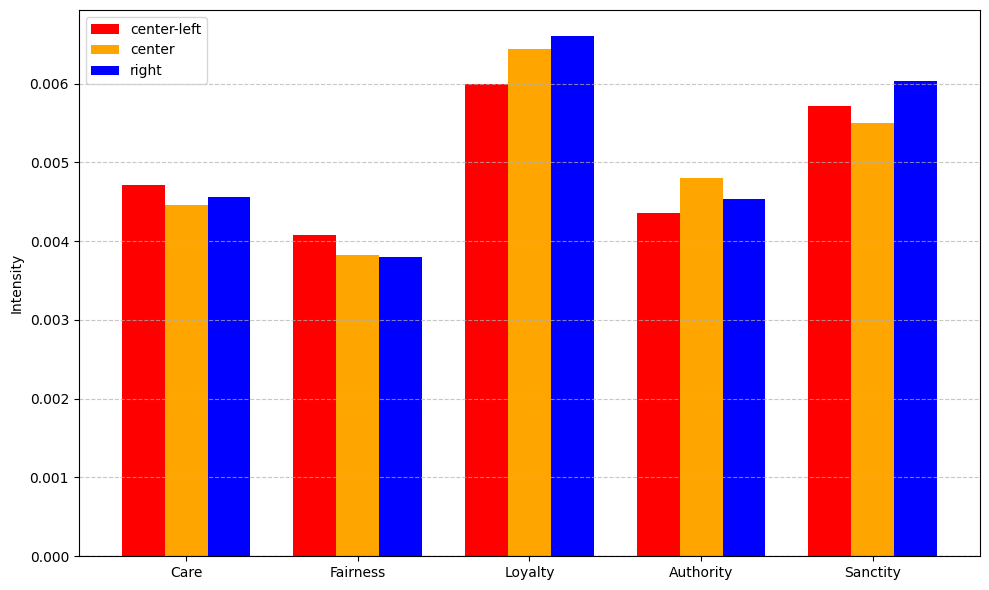

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'center': [0.004456, 0.003823, 0.006436, 0.004808, 0.005506],
    'center-left': [0.004715, 0.004077, 0.005989, 0.004357, 0.005718],
    'right': [0.004562, 0.003796, 0.006604, 0.004538, 0.006032]
}

frames = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity']
df = pd.DataFrame(data, index=frames)

# Plot
colors = ["#FF0000", "#FFA500", "#0000FF"]
ax = df[['center-left','center','right']].plot(kind='bar', figsize=(10, 6), width=0.75,color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.ylabel('Intensity')
plt.xticks(rotation=360)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("new_cluster/plots/FramingIntensity.png", bbox_inches="tight")
plt.show()



In [4]:
def compute_frame_intensity(frame_bias_file, baseline_bias_file, output_dir):
    columns = ["Care", "Fairness", "Loyalty", "Authority", "Sanctity"]
    frame_bias_df = pd.read_csv(frame_bias_file, skiprows=2, header=None, names=columns)
    baseline_bias_df = pd.read_csv(baseline_bias_file, skiprows=2, header=None, names=columns)

    frame_intensity_df = frame_bias_df.copy()
    for column in frame_bias_df.columns:
        # Calculate the baseline bias as the mean of the baseline bias values
        baseline_bias = baseline_bias_df[column].mean()

        # Calculate the intensity as the squared deviation from the baseline bias
        # This aligns with the concept of variance
        frame_intensity_df[column] = (frame_bias_df[column] - baseline_bias) ** 2

    base_name = os.path.basename(frame_bias_file).split(".")[0]
    output_file_name = f"{base_name}_frame_intensity.csv"
    output_file_path = os.path.join(output_dir, output_file_name)

    # Define the two-line header as a string
    header = "Care,Fairness,Loyalty,Authority,Sanctity\nHarm,Cheating,Betrayal,Subversion,Degradation\n"

    # Save the frame intensity data to a new CSV file in the specified output directory with the headers
    with open(output_file_path, "w") as file:
        file.write(header)
    frame_intensity_df.to_csv(output_file_path, index=False, header=False, mode="a")
    return frame_intensity_df

In [6]:
frame_bias_file = "new_cluster/custom_files/dimensions/center.csv"
baseline_bias_file = "new_cluster/custom_files/dimensions/baseline_presse.csv"
output_dir = "new_cluster/custom_files/dimensions"
compute_frame_intensity(frame_bias_file, baseline_bias_file, output_dir)

,Care,Fairness,Loyalty,Authority,Sanctity
0,0.000595,0.002340,0.000711,0.000380,0.003096
1,0.001004,0.000101,0.000427,0.001673,0.030245
2,0.000064,0.000296,0.000022,0.001354,0.000045
3,0.000476,0.000273,0.001271,0.002294,0.010423
4,0.000108,0.002823,0.026920,0.006509,0.011379
...,...,...,...,...,...
9915,0.033624,0.017215,0.017692,0.000886,0.017151
9916,0.008067,0.000464,0.000885,0.000273,0.000206
9917,0.005050,0.000844,0.020594,0.000264,0.012780
9918,0.003124,0.003870,0.007004,0.001055,0.000002


In [5]:
frame_bias_file = "new_cluster/custom_files/dimensions/center-left.csv"
baseline_bias_file = "new_cluster/custom_files/dimensions/baseline_presse.csv"
output_dir = "new_cluster/custom_files/dimensions"
compute_frame_intensity(frame_bias_file, baseline_bias_file, output_dir)

,Care,Fairness,Loyalty,Authority,Sanctity
0,0.002136,0.001045,0.000906,0.007940,0.000078
1,0.001836,0.000236,0.000919,0.017828,0.001643
2,0.000303,0.000020,0.001417,0.000674,0.000112
3,0.000442,0.002114,0.006893,0.009779,0.006989
4,0.000342,0.001452,0.001972,0.000578,0.000045
...,...,...,...,...,...
32399,0.005295,0.000949,0.000944,0.009629,0.000773
32400,0.039295,0.000289,0.002430,0.000016,0.001187
32401,0.015428,0.007659,0.050884,0.014164,0.050511
32402,0.000967,0.013852,0.000027,0.003020,0.000059


In [6]:
frame_bias_file = "new_cluster/custom_files/dimensions/right.csv"
baseline_bias_file = "new_cluster/custom_files/dimensions/baseline_presse.csv"
output_dir = "new_cluster/custom_files/dimensions"
compute_frame_intensity(frame_bias_file, baseline_bias_file, output_dir)

,Care,Fairness,Loyalty,Authority,Sanctity
0,0.000341,0.006629,0.000821,0.000008,0.000023
1,0.001589,0.008397,0.001646,0.006052,0.000050
2,0.000232,0.013902,0.004911,0.008537,0.003588
3,0.000081,0.000570,0.001375,0.001134,0.006925
4,0.005392,0.010988,0.062196,0.034466,0.046848
...,...,...,...,...,...
6718,0.001650,0.003489,0.001075,0.000098,0.000757
6719,0.003806,0.003363,0.012509,0.007935,0.004258
6720,0.008511,0.022825,0.018466,0.024196,0.022405
6721,0.004594,0.006031,0.000422,0.001871,0.000293


In [20]:
# load data for logistic regression
input_dir = "new_cluster/custom_files/dimensions"
bias_columns = ["Care_bias", "Fairness_bias", "Loyalty_bias", "Authority_bias", "Sanctity_bias"]
intensity_columns = [
    "Care_intensity",
    "Fairness_intensity",
    "Loyalty_intensity",
    "Authority_intensity",
    "Sanctity_intensity",
]

right_intensity_df = pd.read_csv(
    input_dir + "/right_frame_intensity.csv", skiprows=2, header=None, names=intensity_columns
)

center_left_intensity_df = pd.read_csv(
    input_dir + "/center-left_frame_intensity.csv",
    skiprows=2,
    header=None,
    names=intensity_columns,
)
center_intensity_df = pd.read_csv(
    input_dir + "/center_frame_intensity.csv", skiprows=2, header=None, names=intensity_columns
)
right_bias_df = pd.read_csv(input_dir + "/right.csv", skiprows=2, header=None, names=bias_columns)
center_left_bias_df = pd.read_csv(input_dir + "/center-left.csv", skiprows=2, header=None, names=bias_columns)
center_bias_df = pd.read_csv(input_dir + "/center.csv", skiprows=2, header=None, names=bias_columns)

# add political labels to the dataframes
right_bias_df["label"] = "R"
center_left_bias_df["label"] = "CL"
center_bias_df["label"] = "C"

# combine bias and intensity dataframes
right_df = pd.concat([right_intensity_df, right_bias_df], axis=1)
center_left_df = pd.concat([center_left_intensity_df, center_left_bias_df], axis=1)
center_df = pd.concat([center_intensity_df, center_bias_df], axis=1)
data_df = pd.concat([right_df, center_left_df, center_df], ignore_index=True)

# print class distribution
print(f"Right: {len(right_df)}, {len(right_df) / len(data_df) * 100:.2f}%")
print(f"Center-Left: {len(center_left_df)}, {len(center_left_df) / len(data_df) * 100:.2f}%")
print(f"Center: {len(center_df)}, {len(center_df) / len(data_df) * 100:.2f}%")
print(f"Total: {len(data_df)}")

Right: 6723, 13.71%
Center-Left: 32404, 66.07%
Center: 9920, 20.23%
Total: 49047


In [21]:
# split data into features and labels
X = data_df.drop(columns=["label"])
y = data_df["label"]

# split into test and train sets
# very small test set since we are primarily interested in the coefficients
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=True, random_state=42, stratify=y)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# train logistic regression model to predict political labels based on bias and intensity
classifier = LogisticRegression(max_iter=10000, class_weight="balanced", random_state=42, C=0.1)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           C       0.23      0.40      0.29       496
          CL       0.70      0.37      0.49      1621
           R       0.18      0.39      0.24       336

    accuracy                           0.38      2453
   macro avg       0.37      0.39      0.34      2453
weighted avg       0.53      0.38      0.41      2453



In [25]:
# extract and save coefficients
coef_df = pd.DataFrame(classifier.coef_, columns=X.columns, index=classifier.classes_)
print("\nCoefficients:")
print(coef_df)

coef_df.to_csv("new_cluster/custom_files/logistic_regression_coefficients.csv")


Coefficients:
    Care_intensity  Fairness_intensity  Loyalty_intensity  \
C         0.003708           -0.021646           0.000127   
CL        0.031173            0.049580          -0.045787   
R        -0.034880           -0.027934           0.045659   

    Authority_intensity  Sanctity_intensity  Care_bias  Fairness_bias  \
C              0.051656           -0.038356   0.039242      -0.060968   
CL            -0.032953            0.005320   0.003353       0.092704   
R             -0.018702            0.033036  -0.042595      -0.031736   

    Loyalty_bias  Authority_bias  Sanctity_bias  
C       0.041473       -0.008506       0.074329  
CL     -0.136528        0.043527      -0.002440  
R       0.095055       -0.035022      -0.071888  


In [23]:
def plot_label_means(file_paths, custom_names, output_dir, name="Temp", colors=None):
    if not file_paths or len(file_paths) != len(custom_names):
        print("Error: Ensure file_paths and custom_names are non-empty and have the same length.")
        return

    df_list = []
    for file_path, label in zip(file_paths, custom_names):
        df = pd.read_csv(file_path)
        df_mean = df.mean().to_frame(name=label)
        df_mean.index.name = "Label"
        df_list.append(df_mean)
    merged_df = pd.concat(df_list, axis=1)
    merged_df = merged_df.iloc[::-1]
    plt.figure(figsize=(8, 6))
    merged_df.plot(kind="barh", figsize=(8, 6), width=0.7, color=colors)

    plt.xlabel("")
    plt.ylabel("")
    plt.title(name)
    plt.legend(custom_names, loc="upper right", bbox_to_anchor=(1, 1), prop={"size": 9.5})
    plt.tight_layout()
    plt.xlim(0, 1)
    for x in [0.2, 0.4, 0.6, 0.8]:
        plt.axvline(x=x, color="grey", linestyle="--")
    output_file = os.path.join(output_dir, f"Label_{name}.png")
    plt.savefig(output_file, bbox_inches="tight")
    plt.close()
    print(f"Plot saved: {output_file}")

In [ ]:
plot_name = "NGOs vs IGOs vs Newspapers"

file_paths = [
    "new_cluster/custom_files/original_labels/NGO.csv",
    "new_cluster/custom_files/original_labels/IGO.csv",
    "new_cluster/custom_files/original_labels/Presse.csv",
]

custom_names = ["NGOs", "IGOs", "Newspapers"]
output_dir = "new_cluster/plots/"

# colors (optional)
custom_colors = ["#1F77B4", "#FF7F0E", "#2CA02C"]

# Generate plot
plot_label_means(file_paths, custom_names, output_dir, plot_name, colors=custom_colors)

Plot saved: new_cluster/plots/NGOs vs IGOs vs Newspapers.png


<Figure size 800x600 with 0 Axes>

In [ ]:
plot_name = "Left vs Right - Newspapers"

file_paths = [
    "new_cluster/custom_files/labels/center.csv",
    "new_cluster/custom_files/labels/center-left.csv",
    "new_cluster/custom_files/labels/right.csv",
]

custom_names = ["center", "center-left", "right"]
output_dir = "new_cluster/plots/"

# colors (optional)
custom_colors = ["#FFA500", "#FF0000", "#0000FF"]

# Generate plot
plot_label_means(file_paths, custom_names, output_dir, plot_name, colors=custom_colors)

Plot saved: new_cluster/plots/Left vs Right - Newspapers.png


<Figure size 800x600 with 0 Axes>

In [ ]:
plot_name = "Newspapers over Time"

file_paths = [
    "new_cluster/custom_files/labels/2008.csv",
    "new_cluster/custom_files/labels/2009.csv",
    "new_cluster/custom_files/labels/2010.csv",
    "new_cluster/custom_files/labels/2014.csv",
    "new_cluster/custom_files/labels/2015.csv",
    "new_cluster/custom_files/labels/2016.csv",
    "new_cluster/custom_files/labels/2017.csv",
    "new_cluster/custom_files/labels/2020.csv",
    "new_cluster/custom_files/labels/2021.csv",
]

custom_names = ["2008", "2009", "2010", "2014", "2015", "2016", "2017", "2020", "2021"]
output_dir = "new_cluster/plots/"

# colors (optional)
custom_colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#4E372D", "#EBC750", "#7F7F7F", "#A6204B"]

# Generate plot
plot_label_means(file_paths, custom_names, output_dir, plot_name, colors=custom_colors)

Plot saved: new_cluster/plots/Newspapers over Time.png


<Figure size 800x600 with 0 Axes>

In [ ]:
def combine_csv_by_organization(root_path, output_dir, labels=True):
    os.makedirs(output_dir, exist_ok=True)
    for category in os.listdir(root_path):
        category_path = os.path.join(root_path, category)
        if not os.path.isdir(category_path):
            continue
        org_files = defaultdict(list)
        for subdir, _, files in os.walk(category_path):
            for file in files:
                if file.endswith(".csv"):
                    prefix = file.split("-")[0]
                    org_files[prefix].append(os.path.join(subdir, file))
        category_output_path = os.path.join(output_dir, category)
        os.makedirs(category_output_path, exist_ok=True)

        for org, file_list in org_files.items():
            if labels:
                combined_data = pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)
            else:
                combined_data = pd.concat([pd.read_csv(f, header=[0, 1]) for f in file_list], ignore_index=True)
            output_file = os.path.join(category_output_path, f"{org}.csv")
            combined_data.to_csv(output_file, index=False)
            print(f"Saved: {output_file}")

In [ ]:
combine_csv_by_organization("new_cluster/original_labels/by_org", "new_cluster/custom_files/labels", labels=True)

In [ ]:
combine_csv_by_organization(
    "new_cluster/original_dimensions/by_org", "new_cluster/custom_files/dimensions", labels=False
)

Saved: new_cluster/custom_files/dimensions\IGO\IPCC.csv
Saved: new_cluster/custom_files/dimensions\IGO\REDD.csv
Saved: new_cluster/custom_files/dimensions\IGO\UNDP.csv
Saved: new_cluster/custom_files/dimensions\IGO\UNEP.csv
Saved: new_cluster/custom_files/dimensions\IGO\WB.csv
Saved: new_cluster/custom_files/dimensions\IGO\WMO.csv
Saved: new_cluster/custom_files/dimensions\IGO\WHO.csv
Saved: new_cluster/custom_files/dimensions\IGO\UNCDF.csv
Saved: new_cluster/custom_files/dimensions\IGO\UNFCCC.csv
Saved: new_cluster/custom_files/dimensions\NGO\CG.csv
Saved: new_cluster/custom_files/dimensions\NGO\EDF.csv
Saved: new_cluster/custom_files/dimensions\NGO\FoEI.csv
Saved: new_cluster/custom_files/dimensions\NGO\GP.csv
Saved: new_cluster/custom_files/dimensions\NGO\NRDC.csv
Saved: new_cluster/custom_files/dimensions\NGO\OX.csv
Saved: new_cluster/custom_files/dimensions\NGO\WWF.csv
Saved: new_cluster/custom_files/dimensions\NGO\Action.csv
Saved: new_cluster/custom_files/dimensions\NGO\CAN.csv


In [16]:
def compare_plots(dfs, titles, scale, colors, save=False, compare=None):
    name_left = dfs[0].columns.map(lambda x: x[1])
    name_right = dfs[0].columns.map(lambda x: x[0])
    means = [df.mean() for df in dfs]
    intens = [(df.var().fillna(0) + 0.001) * 50_000 for df in dfs]
    legend_entries = [mpatches.Patch(color=colors[0], label=titles[0])]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(x=means[0], y=name_left, s=intens[0], c=colors[0])
    plt.axvline(0)
    plt.gca().invert_yaxis()
    ax.twinx().set_yticks(ax.get_yticks(), labels=name_right[::-1])
    fig.axes[0].set_axisbelow(True)
    fig.axes[0].yaxis.grid(color="gray", linestyle="dashed")
    plt.xlim(-scale, scale)
    for i in range(1, len(dfs)):
        legend_entries.append(mpatches.Patch(color=colors[i], label=titles[i]))
        plt.scatter(x=means[i], y=name_left, s=intens[i], c=colors[i])

    plt.gcf().set_size_inches(10, 7)
    plt.tight_layout()
    plt.legend(handles=legend_entries)
    return fig

def compareCustom(file_paths, scale, output_dir, custom_names=None, title=None, colors=list(mcolors.TABLEAU_COLORS)):
    dfs = []
    names = []
    for path in file_paths:
        dfs.append(pd.read_csv(path, header=[0, 1]))
        names.append(os.path.splitext(os.path.basename(path))[0])
    if custom_names is not None:
        names = custom_names
    if title is None:
        title = f"Comparing {names[0]}"
        for name in names[1:]:
            title += f" and {name}"
    g = compare_plots(dfs, names, scale, colors)
    plt.title(title)
    print(f"\t\t- " + str(title))
    output_file = os.path.join(output_dir, f"Dim_{title}.png")
    plt.savefig(output_file, bbox_inches="tight")




		- Left vs Right - Newspapers


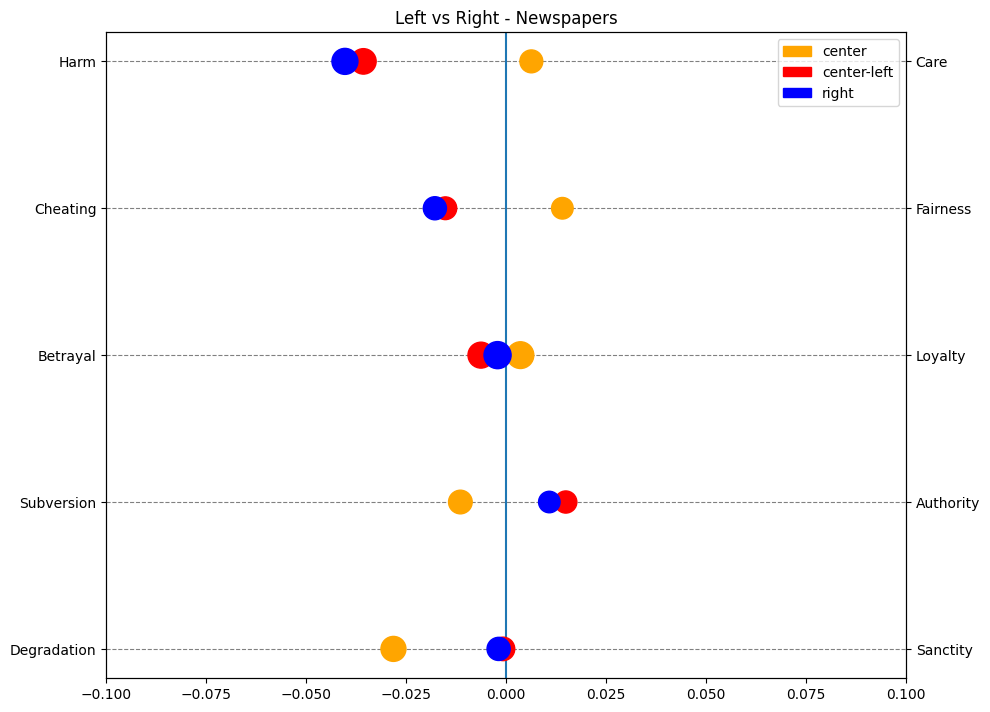

In [17]:
plot_name = "Left vs Right - Newspapers"

file_paths = [
    "new_cluster/custom_files/dimensions/center.csv",
    "new_cluster/custom_files/dimensions/center-left.csv",
    "new_cluster/custom_files/dimensions/right.csv",
]

custom_name = ["center", "center-left", "right"]
output_dir = "new_cluster/plots/"

# colors (optional)
custom_colors = ["#FFA500", "#FF0000", "#0000FF"]
# scale
scale = 0.1

# Generate plot
compareCustom(file_paths, scale, output_dir, custom_names=custom_name, title=plot_name, colors=custom_colors)


		- Coefficients Left vs Right - Newspapers


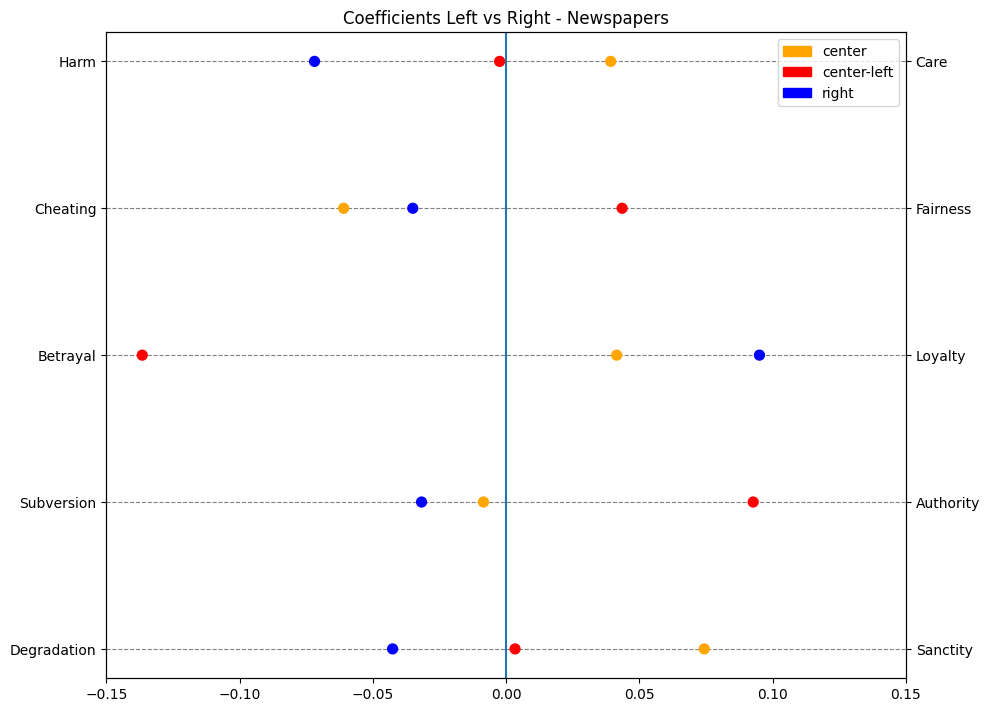

In [20]:
plot_name = "Coefficients Left vs Right - Newspapers"

file_paths = [
    "new_cluster/custom_files/logistic_regression_bias_center.csv",
    "new_cluster/custom_files/logistic_regression_bias_center_left.csv",
    "new_cluster/custom_files/logistic_regression_bias_right.csv",
]

custom_name = ["center", "center-left", "right"]
output_dir = "new_cluster/plots/"

# colors (optional)
custom_colors = ["#FFA500", "#FF0000", "#0000FF"]
# scale
scale = 0.15

# Generate plot
compareCustom(file_paths, scale, output_dir, custom_names=custom_name, title=plot_name, colors=custom_colors)

		- Newspapers over Time


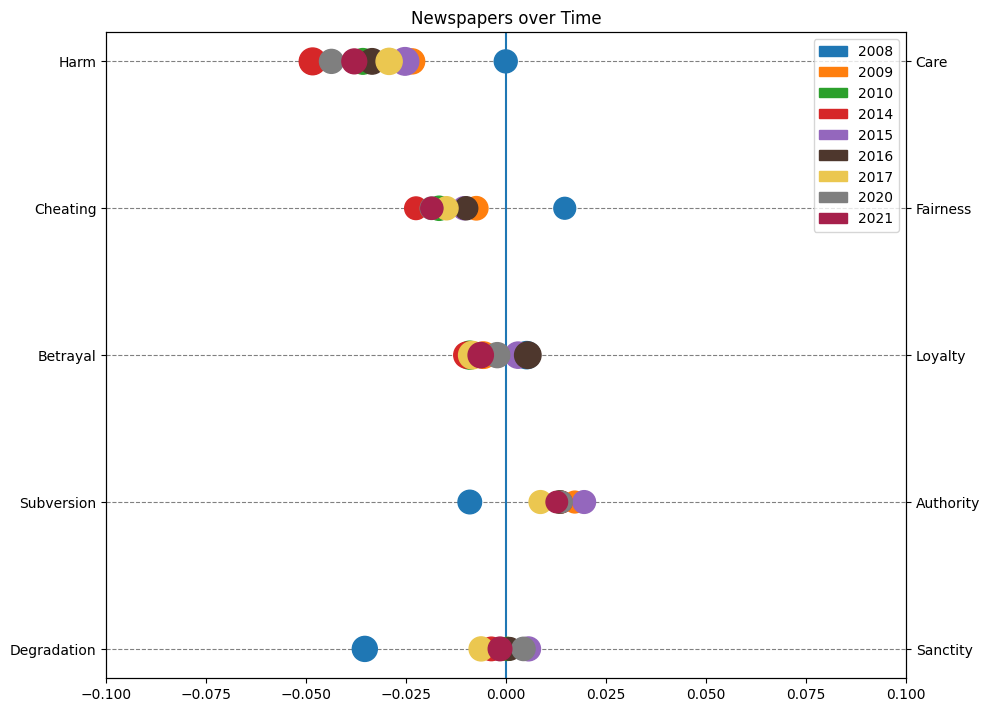

In [18]:
plot_name = "Newspapers over Time"

file_paths = [
    "new_cluster/custom_files/dimensions/2008.csv",
    "new_cluster/custom_files/dimensions/2009.csv",
    "new_cluster/custom_files/dimensions/2010.csv",
    "new_cluster/custom_files/dimensions/2014.csv",
    "new_cluster/custom_files/dimensions/2015.csv",
    "new_cluster/custom_files/dimensions/2016.csv",
    "new_cluster/custom_files/dimensions/2017.csv",
    "new_cluster/custom_files/dimensions/2020.csv",
    "new_cluster/custom_files/dimensions/2021.csv",
]

custom_name = ["2008", "2009", "2010", "2014", "2015", "2016", "2017", "2020", "2021"]
output_dir = "new_cluster/plots/"

# colors (optional)
custom_colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#4E372D", "#EBC750", "#7F7F7F", "#A6204B"]

# scale
scale = 0.1
# Generate plot
compareCustom(file_paths, scale, output_dir, custom_names=custom_name, title=plot_name, colors=custom_colors)